In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [92]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [93]:
dataset = {
    'y' : [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849],
    'x' : [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632]
}
dataset=pd.DataFrame(dataset)
dataset.head()

,y,x
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [94]:
dataset.describe()

,y,x
count,10.000000,10.000000
mean,2212.400000,6806.600000
std,859.882447,2939.600283
min,849.000000,1632.000000
25%,1448.500000,4311.500000
50%,2598.500000,8162.500000
75%,2881.250000,8760.500000
max,3074.000000,9915.000000


In [95]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       10 non-null     int64
 1   x       10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


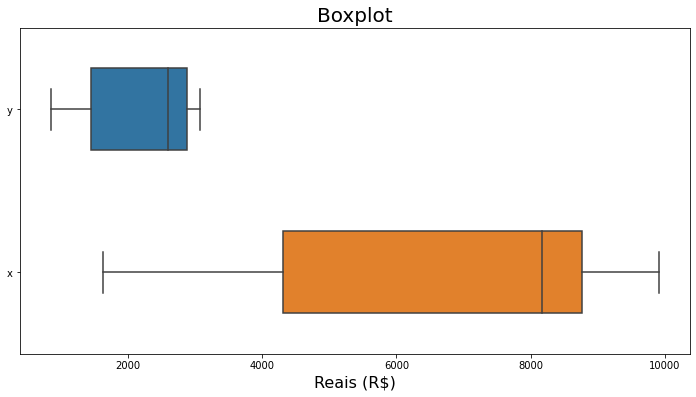

In [96]:
ax = sns.boxplot(data=dataset, orient='h', width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Boxplot', fontsize=20)
ax.set_xlabel('Reais (R$)', fontsize=16)
ax

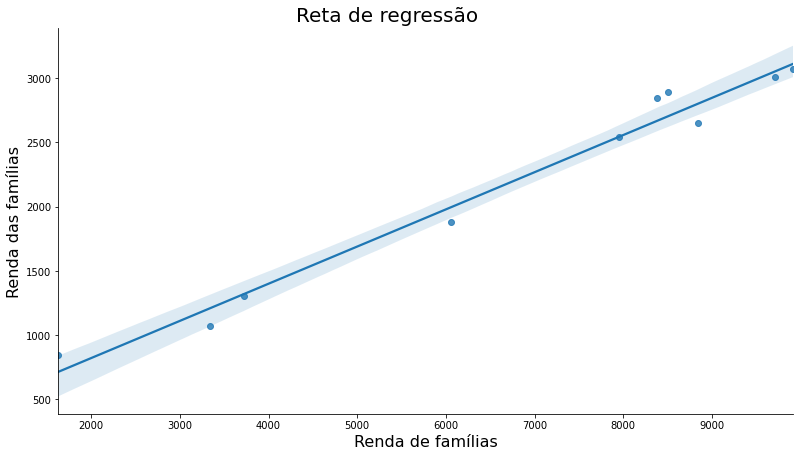

In [97]:
ax = sns.lmplot(data=dataset, x='x', y='y')
ax.fig.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão', fontsize=20, y=1.02)
ax.set_xlabels('Renda de famílias', fontsize=16)
ax.set_ylabels('Renda das famílias', fontsize=16)
ax

In [98]:
dataset.corr()

,y,x
y,1.000000,0.989013
x,0.989013,1.000000


In [99]:
import statsmodels.api as sm

In [100]:
y = dataset.y
x = sm.add_constant(dataset.x)

In [61]:
y.head()

0    3011
1    1305
2    1879
3    2654
4    2849
Name: y, dtype: int64

In [62]:
x.head()

,const,x
0,1.0,9714
1,1.0,3728
2,1.0,6062
3,1.0,8845
4,1.0,8378


In [63]:
resultado = sm.OLS(y, x).fit()
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     358.1
Date:                Thu, 08 Apr 2021   Prob (F-statistic):           6.29e-08
Time:                        00:41:03   Log-Likelihood:                -62.113
No. Observations:                  10   AIC:                             128.2
Df Residuals:                       8   BIC:                             128.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.2305    112.457      2.163      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [40]:
dataset['y_pred'] = resultado.predict()
dataset

,x,y,y_pred
0,3011,9714,9506.704555
1,1305,3728,3738.637475
2,1879,6062,5679.358755
3,2654,8845,8299.670588
4,2849,8378,8958.974855
5,1068,3338,2937.329211
6,2892,8507,9104.359899
7,2543,7947,7924.374312
8,3074,9915,9719.710549
9,849,1632,2196.879803


##Correlações

In [15]:
amostra = dados.query('Renda < 5000').sample(n=20, random_state=101)

In [16]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


In [17]:
amostra.Idade.var()

134.4105263157895

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


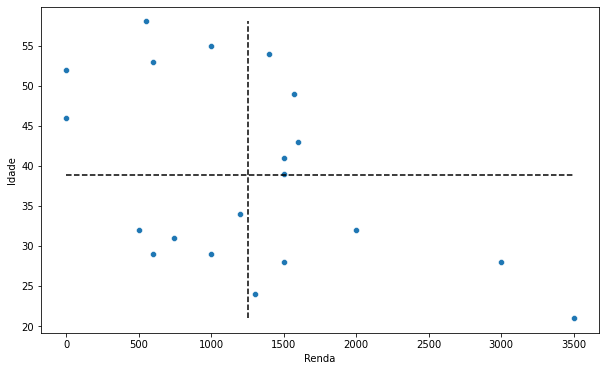

In [18]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), color='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), color='black', linestyles='dashed')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


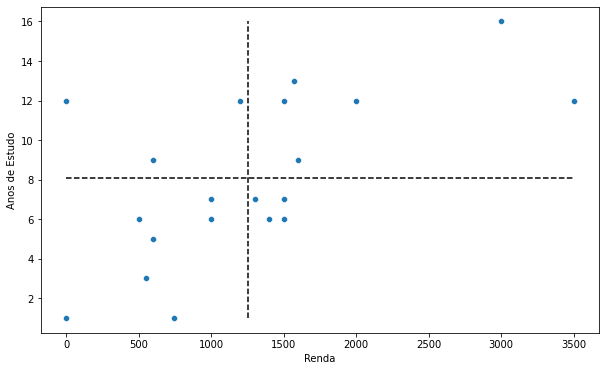

In [19]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), color='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), color='black', linestyles='dashed')
ax

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


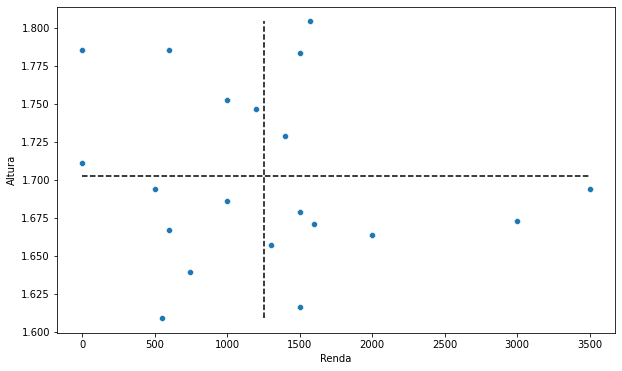

In [20]:
x = amostra.Renda
y = amostra.Altura

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), color='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), color='black', linestyles='dashed')
ax

##Correlação de Pearson

In [21]:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [22]:
s_xy = s_xy.Altura.loc['Renda']
s_xy

-1.0789639314252726

In [23]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

In [24]:
r_xy = s_xy/(s_x * s_y)
r_xy

-0.0040726081433995155

In [25]:
dados[['Altura', 'Renda']].corr()


,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [26]:
dataset[['x', 'y']].corr()

,x,y
x,1.000000,0.989013
y,0.989013,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


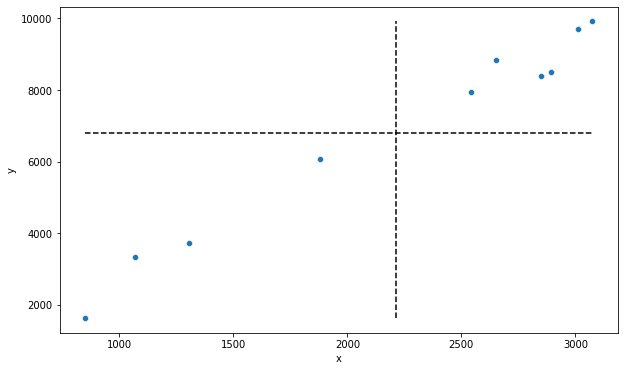

In [27]:
x = dataset.x
y = dataset.y

ax = sns.scatterplot(x, y)
ax.figure.set_size_inches(10,6)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), color='black', linestyles='dashed')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), color='black', linestyles='dashed')
ax

In [28]:
 r = 2178803.59/(np.sqrt(7328864.85)*np.sqrt(667839.79))
 r

0.9848352396678838

##Minimos quadrados

In [90]:
y = dataset.y

AttributeError: ignored

In [91]:
x = sm.add_constant(dataset.x)

AttributeError: ignored

In [66]:
resultado = sm.OLS(y, x, missing='drop').fit()

In [71]:
resultado.params

const    243.230452
x          0.289303
dtype: float64

In [74]:
b1 = resultado.params[0]

In [73]:
b2 = resultado.params[1]

In [68]:
resultado.conf_int(alpha=0.05)

,0,1
const,-16.096224,502.557128
x,0.254048,0.324558


In [106]:
dataset = {
    'Y': [670, 220, 1202, 188, 1869, 248, 477, 1294, 816, 2671, 1403, 1586, 3468, 973, 701, 5310, 10950, 2008, 9574, 28863, 6466, 4274, 6432, 1326, 1423, 3211, 2140], 
    'X': [1.59, 0.56, 2.68, 0.47, 5.2, 0.58, 1.32, 3.88, 2.11, 5.53, 2.6, 2.94, 6.62, 1.91, 1.48, 10.64, 22.39, 4.2, 21.9, 59.66, 14.22, 9.57, 14.67, 3.28, 3.49, 6.94, 6.25]
}

df = pd.DataFrame(dataset)
df.head()

,Y,X
0,670,1.59
1,220,0.56
2,1202,2.68
3,188,0.47
4,1869,5.20


In [107]:
y = df.Y

In [108]:
x = sm.add_constant(df.X)
x.head()

,const,X
0,1.0,1.59
1,1.0,0.56
2,1.0,2.68
3,1.0,0.47
4,1.0,5.20


In [109]:
resultado = sm.OLS(y, x, missing='drop').fit()
resultado.params

const   -168.321156
X        481.390397
dtype: float64

In [110]:
resultado.predict([1, 2.345678])[0]

960.8657076138517

In [111]:
resultado.rsquared

0.9967917066613234

In [75]:
dataset['y_pred'] = b1+b2*dataset.x
dataset

,y,x,y_pred
0,3011,9714,3053.519435
1,1305,3728,1321.751898
2,1879,6062,1996.985014
3,2654,8845,2802.115160
4,2849,8378,2667.010676
5,1068,3338,1208.923742
6,2892,8507,2704.330758
7,2543,7947,2542.321099
8,3074,9915,3111.669330
9,849,1632,715.372888


In [76]:
def prever(x):
    return b1+b2*x

In [78]:
prever(7510)

2415.895704189313

In [79]:
resultado.predict([1, 7510])

array([2415.89570419])

In [80]:
resultado.predict([1, 7510])[0]

2415.895704189313

##Resíduos

In [101]:
resultado.ssr

2764109.3924916484

In [102]:
resultado.ess

858787220.4593601

In [105]:
resultado.rsquared

0.9967917066613234